In [1]:
# Import the required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise is a clustering algorithm which
# works better than KMeans and AgglomerativeHeirarchicalClustering in many cases.

# The reason for this is unlike the other two clustering methods this clustering method is based on density of the points.
# Here we put each point into three different classes:
'''
            Core : The given point has points greater than or equal to min_pts in its epsilon neighborhood .
            Boundary/Border : The given point has points less than min_pts but contains one core in its epsilon neighborhood .
            Noise : Points which are nor core and nor border points.
'''
# Note : The min_pts and epsilon are hyperparameters and we have control over them (this means if given incorrect values,
# clusters will form irregularly).

'\n            Core : The given point has points greater than or equal to min_pts in its epsilon neighborhood .\n            Boundary/Border : The given point has points less than min_pts but contains one core in its epsilon neighborhood .\n            Noise : Points which are nor core and nor border points.\n'

In [3]:
# We will make moons to start on which other clustering algorithms may fail to cluster irregular shaped groups.
from sklearn.datasets import make_moons # Import make_moons from datasets module 

In [4]:
# The make_moons function is similar to make_circles but creates the moons instead.
X,y = make_moons(
                    n_samples=1000, # The number or rows
                    noise = 0.095, # The noise to be added
                    shuffle = True # If true shuffles the values each time.
)

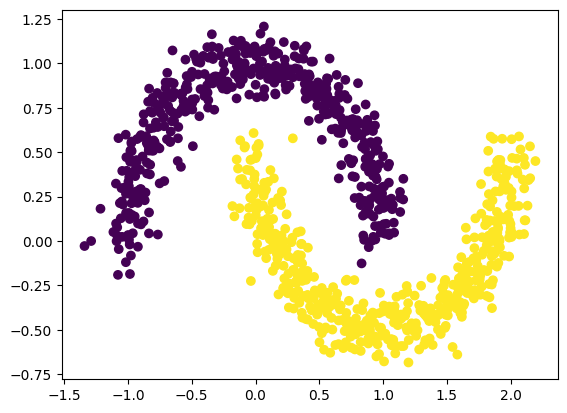

In [5]:
# Plotting the moons
plt.scatter(
                x = X[:,0], # The 1 variable
                y = X[:,1], # The 2 variable
                c = y # label
)
plt.show()

In [6]:
# Import the StandardScaler as DBSCAN is sensitive to distance we will Standardize it .
from sklearn.preprocessing import StandardScaler

In [7]:
X[:11] # The first 10 values

array([[ 0.79834697, -0.38349851],
       [ 2.10538764,  0.03893134],
       [-0.90582146,  0.40092446],
       [ 1.82618963,  0.39129354],
       [ 0.86321289,  0.16165472],
       [-0.18408986,  0.86704763],
       [-0.03958971,  0.45641   ],
       [ 1.92110992,  0.41562187],
       [ 0.03417126,  0.1932528 ],
       [ 0.13316773, -0.0362947 ],
       [ 0.31909516, -0.23648722]])

In [8]:
X = StandardScaler().fit_transform(X) # Instantiate and fit the scaler with X

In [9]:
X[:11] # The first 10 values after scalling

array([[ 0.34136593, -1.26257625],
       [ 1.8358483 , -0.41774948],
       [-1.60719597,  0.30620852],
       [ 1.51661072,  0.28694743],
       [ 0.41553422, -0.17231229],
       [-0.78196141,  1.23841852],
       [-0.61673859,  0.41717528],
       [ 1.62514345,  0.3356022 ],
       [-0.53239963, -0.1091186 ],
       [-0.41920614, -0.5681957 ],
       [-0.20661501, -0.96856513]])

In [10]:
# Import the DBSCAN class fromm the cluster module
from sklearn.cluster import DBSCAN

In [11]:
# Instantiate the DBSCAN model with parameters set appropriately.
dbs = DBSCAN(
                eps = 0.2, # Really highly hyper sensitive parameter.
                min_samples = 5, # The minimum no of samples to cluster in a epsilon neighborhood.
                metric = "euclidean" # The metric used to calculate the distance.
)

In [12]:
y_pred = dbs.fit_predict(X) # Predict the labels using variables.

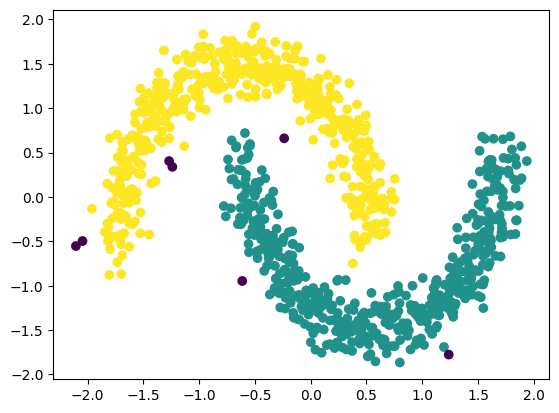

In [13]:
# Plot the predicted labels.
plt.scatter(
                x = X[:,0],
                y = X[:,1],
                c = y_pred
)
plt.show()

In [14]:
# Now we will use circles dataset to test DBSCAN
from sklearn.datasets import make_circles

In [15]:
# The proceedure is same as make_moons ; we have a new parameter called factor which is the distance between the two circles.
X,y = make_circles(
    n_samples = 500,
    noise = 0.05,
    factor = 0.55,
)


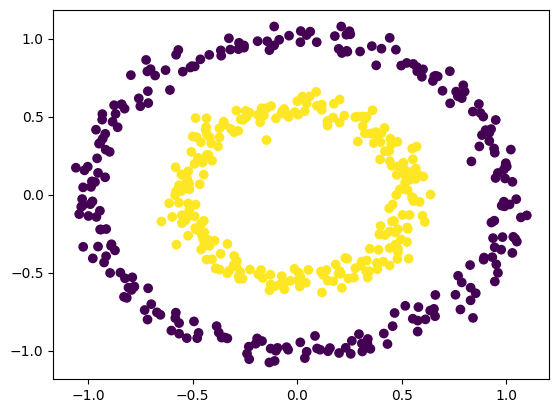

In [16]:
# Visualize the circle and adjust accordingly for Experimentation
plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y
)
plt.show()

In [17]:
X[:11] # The first 10 values

array([[-0.84504415, -0.50016723],
       [ 0.15719642, -0.98359567],
       [-0.95634935,  0.23232069],
       [ 0.30295236, -0.45558109],
       [ 0.95250091, -0.44712585],
       [ 0.47962622,  0.33845813],
       [ 0.44057599, -0.08791998],
       [ 0.44979276,  0.32046415],
       [ 0.21105488,  1.07740101],
       [-0.2586341 ,  0.47859258],
       [-0.51992172,  0.15002636]])

In [18]:
X = StandardScaler().fit_transform(X) # Scalling and fitting 

In [19]:
X[:11]  # The first 10 values after scalling

array([[-1.47186667, -0.87025622],
       [ 0.27183552, -1.71476799],
       [-1.66551591,  0.40934305],
       [ 0.52542229, -0.79236771],
       [ 1.65550949, -0.77759707],
       [ 0.83280018,  0.59475689],
       [ 0.76486043, -0.15009242],
       [ 0.7808958 ,  0.56332281],
       [ 0.36553868,  1.88563245],
       [-0.45162809,  0.83956084],
       [-0.90621736,  0.26558128]])

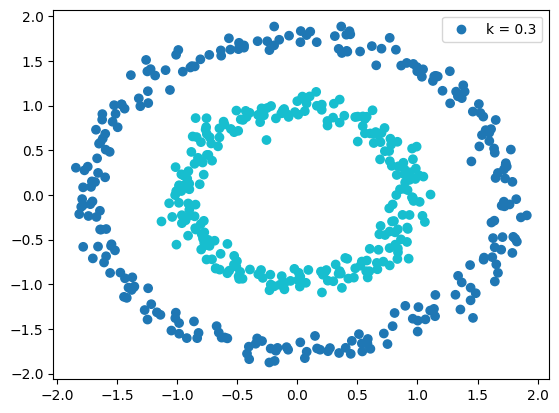

In [33]:
# Now unlike the moons I had to expereiment a lot before reaching the final eps value of 0.3.
# So we will be using different methods to find the perfect eps value.
dbs = DBSCAN(
    eps =  0.3, #0.2125
    min_samples = 5
)

y_pred = dbs.fit_predict(X)

plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y_pred,
    cmap = 'tab10',
    label = f'k = {dbs.eps}'
)
plt.legend()
plt.show()

In [21]:
# Basically to find the perfect epsilon we can find the nearest neighbors for each point and sort their distanes accordingly.
# We will plot this minimum distances and look for the elbow point in it.
# The elbow point traced to y axis is the required epsilon value .

In [36]:
from sklearn.neighbors import NearestNeighbors # Import the NearestNeighbors class from neighbors module 

In [37]:
nbrs = NearestNeighbors(n_neighbors=5) # Instantiate and fit the model with n_neighbors = min_pts in DBSCAN

In [38]:
neighbors_fit = nbrs.fit(X) # Fit the X value

In [39]:
distances,indices = nbrs.kneighbors(X) # Get the indices of the nearest neighbor values and the distances to them.

In [ ]:
min_distances = np.sort(distances[:,4],axis=0) # Sort the values for 5th neighbor 

In [41]:
min_distances[:10] # Examine

array([0.0493456 , 0.05184021, 0.05191886, 0.05392357, 0.05488927,
       0.0550738 , 0.05665748, 0.05859687, 0.05881599, 0.06071096])

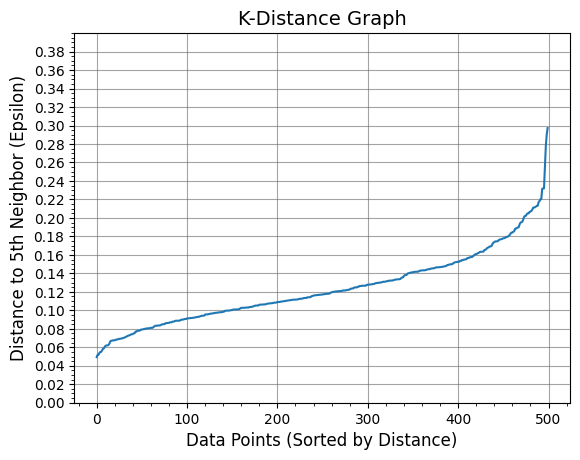

In [63]:
# Plot the elbow diagram
plt.title("K-Distance Graph", fontsize=14)
plt.xlabel("Data Points (Sorted by Distance)", fontsize=12)
plt.ylabel(f"Distance to {5}th Neighbor (Epsilon)", fontsize=12)
plt.plot(min_distances)
plt.grid(True, linestyle='--', alpha=0.7)
plt.minorticks_on() # To enable minor ticks
plt.ylim(0,0.4) # Limit according to the scope of minimum_distance
plt.yticks(np.arange(0, 0.4, 0.02))
plt.grid(visible=True, which='major', color='#666666', linestyle='-', alpha=0.6)
plt.show()

The mathematically optimal Epsilon is: 0.23193059174996739


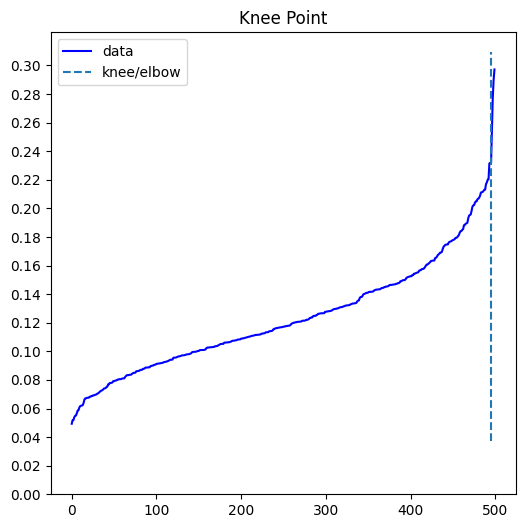

In [67]:
# For more accuarate reading we can locate the elbow with KneeLocator for precise 
from kneed import KneeLocator

# x = the index of your sorted points (0 to N)
# y = your sorted k-distances
x = np.arange(len(min_distances))
y = min_distances

# Find the elbow
kneedle = KneeLocator( 
                        x, # A range of values from 0 to len min_distances 
                        y, # The min_distances
                        S=1.0, # The sensitivity
                        curve="convex",
                        direction="increasing"
                    )
perfect_eps = kneedle.knee_y # Fetch the knee object from kneedle .

print(f"The mathematically optimal Epsilon is: {perfect_eps}")
kneedle.plot_knee() # Plot the knee
plt.yticks(np.arange(0,max(y)+0.02,0.02))
plt.show()

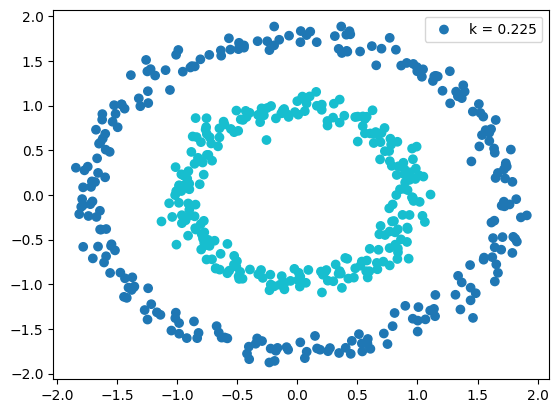

In [45]:
dbs = DBSCAN(
    eps =  0.225,
    min_samples = 5
)

y_pred = dbs.fit_predict(X)

plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y_pred,
    cmap = 'tab10',
    label = f'k = {dbs.eps}'
)
plt.legend()
plt.show()